# Bounding configuration GP example

This notebook is designed to test whether a simple simple comprised of bounding boxes can be generated using [deap](http://deap.readthedocs.io/en/master/api/tools.html), a Python Evolutionary Algorithm Package.

In [1]:
import numpy as np
import pydot
from airconics.topology import Topology

from IPython.display import Image, display

In [2]:
config = Topology()
# Try to compile a single individual and visualise both the tree and geometry
config.randomize()

print(config)

from airconics.Addons.WebServer.TornadoWeb import TornadoWebRenderer

renderer = TornadoWebRenderer()

config.Display(renderer)

renderer

OrderedDict([('liftingsurface2_0', 2)])
2
OrderedDict([('liftingsurface2_0', 2), ('liftingsurface2_1', 2)])
1
OrderedDict([('liftingsurface2_0', 2), ('liftingsurface2_1', 1), ('liftingsurface2_3', 2)])
OrderedDict([('liftingsurface2_0', 2), ('liftingsurface2_1', 1), ('liftingsurface2_3', 1)])
OrderedDict([('liftingsurface2_0', 2), ('liftingsurface2_1', 1), ('liftingsurface2_3', 0), ('fuselage1_5', 1)])
1
OrderedDict([('liftingsurface2_0', 2), ('liftingsurface2_1', 1), ('liftingsurface2_3', 0), ('fuselage1_5', 0), ('fuselage2_6', 2)])
liftingsurface2(rand(), rand(), rand(), rand(), rand(), random_lsurfdict(), mirror2(liftingsurface2(rand(), rand(), rand(), rand(), rand(), random_lsurfdict(), mirror1(empty), liftingsurface2(0.7121859214714442, 0.4345646042109418, 0.6550167720216981, 0.32527577532535623, 0.2643311739655808, AirlinerTP, empty, empty)), fuselage0(rand(), rand(), rand(), rand(), rand(), rand(), rand())), fuselage1(rand(), rand(), rand(), rand(), rand(), rand(), rand(), mirro

<TornadoWebRenderer at http://PChambers_ngcm:36677/get/58293e16aea441a2bad9baee086024bf>

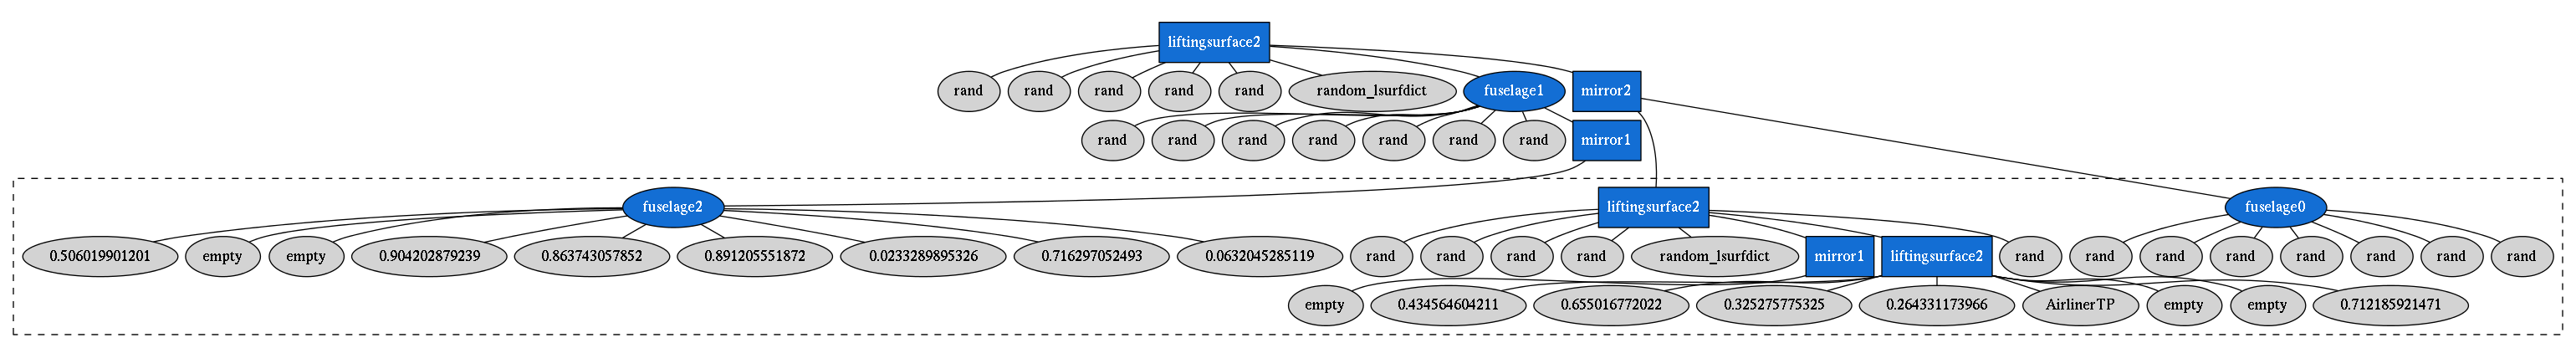

In [3]:
Image(config.pydot_graph().create_png())

In [4]:
config2 = Topology()

expr_string = """fuselage1(0., 0., 0., 1.0, 0.182, 0.293, 0.5, mirror2(
    liftingsurface0(0., 0., 0., 0.68, 0., AirlinerTP),
    liftingsurface0(0.55, 0., 0., 0.5, 0.28, AirlinerFin)))"""
config2.from_string(expr_string)

print(config2)

from airconics.Addons.WebServer.TornadoWeb import TornadoWebRenderer

renderer = TornadoWebRenderer()

config2.Display(renderer)

renderer



OrderedDict([('fuselage1_0', 1)])
2
OrderedDict([('fuselage1_0', 1)])
OrderedDict([('fuselage1_0', 0)])
fuselage1(0.0, 0.0, 0.0, 1.0, 0.182, 0.293, 0.5, mirror2(liftingsurface0(0.0, 0.0, 0.0, 0.68, 0.0, AirlinerTP), liftingsurface0(0.55, 0.0, 0.0, 0.5, 0.28, AirlinerFin)))


<TornadoWebRenderer at http://PChambers_ngcm:42465/get/82a46298382a4109a8c491137b7372f3>

In [5]:
# config2.Write('GP_output.step')
graph = config2.pydot_graph()
Image(graph.create_png())

repr(config2._deap_tree)

'[<deap.gp.Primitive object at 0x7f230bbdeba8>, <deap.gp.Terminal object at 0x7f230bbc6c80>, <deap.gp.Terminal object at 0x7f230bbc6b90>, <deap.gp.Terminal object at 0x7f230bbc6cd0>, <deap.gp.Terminal object at 0x7f230b488050>, <deap.gp.Terminal object at 0x7f230b4880a0>, <deap.gp.Terminal object at 0x7f230b4880f0>, <deap.gp.Terminal object at 0x7f230b488140>, <deap.gp.Primitive object at 0x7f230bbded08>, <deap.gp.Primitive object at 0x7f230bbde7e0>, <deap.gp.Terminal object at 0x7f230b488190>, <deap.gp.Terminal object at 0x7f230b4881e0>, <deap.gp.Terminal object at 0x7f230b488230>, <deap.gp.Terminal object at 0x7f230b488280>, <deap.gp.Terminal object at 0x7f230b4882d0>, <deap.gp.Terminal object at 0x7f230bbc6e60>, <deap.gp.Primitive object at 0x7f230bbde7e0>, <deap.gp.Terminal object at 0x7f230b488320>, <deap.gp.Terminal object at 0x7f230b488370>, <deap.gp.Terminal object at 0x7f230b4883c0>, <deap.gp.Terminal object at 0x7f230b488410>, <deap.gp.Terminal object at 0x7f230b488460>, <dea

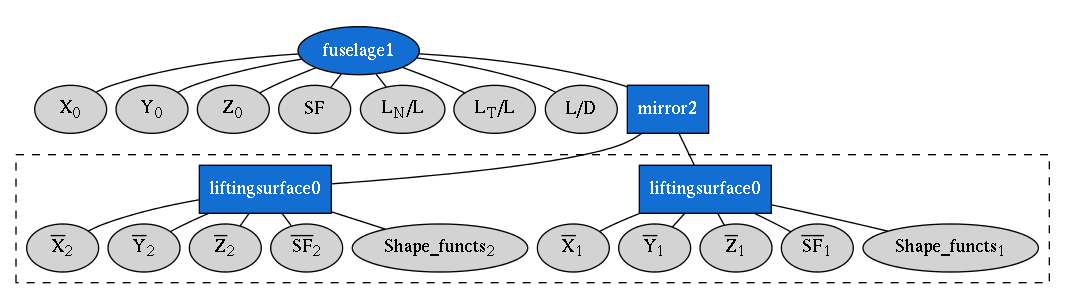

In [6]:
# For now, I'll have to do this by hand...
graph = """digraph G {
ranksep="0.1";
nodesep="0.1";
# splines=ortho;
node [style=filled];
edge [arrowhead=none];
subgraph cluster_standard {
color=invis;
0 [shape=ellipse, fillcolor="#136ed4", label=fuselage1, fontcolor="white"];
1 [shape=ellipse, label=<X<SUB>0</SUB>>];
2 [shape=ellipse, label=<Y<SUB>0</SUB>>];
3 [shape=ellipse, label=<Z<SUB>0</SUB>>];
4 [shape=ellipse, label=<SF>];
5 [shape=ellipse, label=<L<SUB>N</SUB>/L>];
6 [shape=ellipse, label=<L<SUB>T</SUB>/L>];
7 [shape=ellipse, label="L/D"];
8 [shape=box, fillcolor="#136ed4", label="mirror2", fontcolor="white"];
}

subgraph cluster_mirrored {
style=dashed;
9 [shape=box, fillcolor="#136ed4", label=liftingsurface0, fontcolor="white"];
10 [shape=ellipse, label=<<O>X</O><SUB>1</SUB>>];
11 [shape=ellipse, label=<<O>Y</O><SUB>1</SUB>>];
12 [shape=ellipse, label=<<O>Z</O><SUB>1</SUB>>];
13 [shape=ellipse, label=<<O>SF</O><SUB>1</SUB>>];
20 [shape=ellipse, label=<Shape_functs<SUB>1</SUB>>];

rank=same;
14 [shape=box, fillcolor="#136ed4", label=liftingsurface0, fontcolor="white"];
15 [shape=ellipse, label=<<O>X</O><SUB>2</SUB>>];
16 [shape=ellipse, label=<<O>Y</O><SUB>2</SUB>>];
17 [shape=ellipse, label=<<O>Z</O><SUB>2</SUB>>];
18 [shape=ellipse, label=<<O>SF</O><SUB>2</SUB>>];
21 [shape=ellipse, label=<Shape_functs<SUB>2</SUB>>];
}

0 -> 8;
8-> 9;
8 -> 14;

0 -> 1;
0 -> 2;
0 -> 3;
0 -> 4;
0 -> 5;
0 -> 6;
0 -> 7;
# 0 -> 9;
# 0 -> 14;
9 -> 10;
9 -> 11;
9 -> 12;
9 -> 13;
9-> 20;
14 -> 15;
14 -> 16;
14 -> 17;
14 -> 18;
14->21;
}
"""
dotgraph = pydot.graph_from_dot_data(graph)
dotgraph.write_svg('/home/pchambers/Documents/PhD/SABTalk_2017/images/tree1.svg')
Image(dotgraph.create_png())

In [7]:
# dotgraph.write_pdf('/home/pchambers/Documents/PhD/Aviation2017/aviation_2017_paper/figure/gplayout_tree2.pdf')

## Conventional Airliner

OrderedDict([('fuselage2_0', 2)])
OrderedDict([('fuselage2_0', 1)])
2
OrderedDict([('fuselage2_0', 1)])
OrderedDict([('fuselage2_0', 0)])


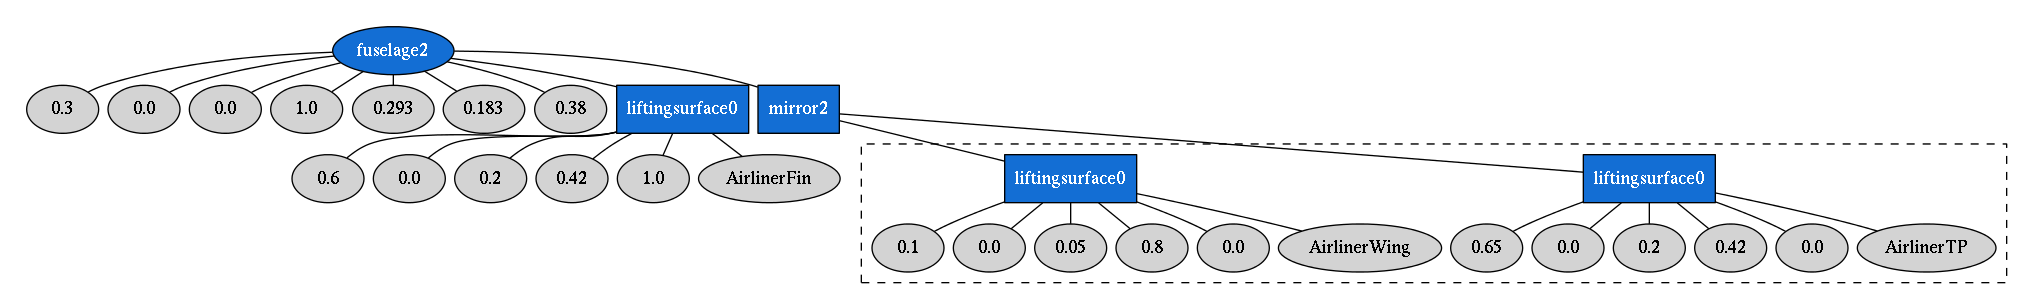

<TornadoWebRenderer at http://PChambers_ngcm:32970/get/4b35b81a3478452ba3c3c523bd3d34bc>

In [8]:
# The string method didn't work: let's do it manually:
topo = Topology()

expr_string = """fuselage2(0.3, 0., 0., 1., 0.293, 0.183, 0.38, 
            liftingsurface0(0.6, 0., 0.2, 0.42, 1.0, AirlinerFin) mirror2(
                liftingsurface0(0.65, 0., 0.2, 0.42, 0., AirlinerTP), liftingsurface0( 0.1, 0., 0.05, 0.8, 0., AirlinerWing)))"""

topo.from_string(expr_string)

renderer = TornadoWebRenderer()

topo.Display(renderer)

display(Image(topo.pydot_graph().create_png()))

renderer

## General Atomics MQ-1 Predator

In [15]:
# The string method didn't work: let's do it manually:
topo = Topology(MaxAttachments=4)

expr_string = """fuselage2(0.3, 0., 0., 1., 0.293, 0.183, 0.38, 
            liftingsurface0(0.6, 0., 0.2, 0.42, 1.0, AirlinerFin) mirror2(
                liftingsurface0(0.65, 0., 0.2, 0.42, 0., AirlinerTP), liftingsurface0( 0.1, 0., 0.05, 0.8, 0., AirlinerWing)))"""

from airconics.topology import LSURF_FUNCTIONS


topo

expr_string = """fuselage2(0.3, 0., 0., 1., 0.293, 0.183, 0.45, 
            liftingsurface0(0.6, 0., 0.2, 0.3, 1.0, StraightWing) mirror2(
                liftingsurface0(0.6, 0., 0.2, 0.3, 0.5, StraightWing), liftingsurface0(0.1, 0., 0.05, 0.8, 0., TaperedWing)))"""

topo.from_string(expr_string)

renderer = TornadoWebRenderer()

topo.Display(renderer)

renderer

OrderedDict([('fuselage2_0', 2)])
OrderedDict([('fuselage2_0', 1)])
2
OrderedDict([('fuselage2_0', 1)])
OrderedDict([('fuselage2_0', 0)])


<TornadoWebRenderer at http://PChambers_ngcm:46593/get/5a809aa7448740dda38a3f418caf0e77>